### 비음수 행렬 분해 (NMF)
* NMF (non-negative matrix factorization)
    * 유용한 특성을 뽑아내기 위한 또 다른 비지도 학습 알고리즘.
    * PCA외도 비슷하고 차원 축소에도 사용할 수 있다.
    * 음수가 아닌 성분과 계수 값을 찾는다.
        * 주성분과 계수가 모두 0보다 크거나 같아야 한다.
        * 음수가 아닌 특성을 가진 데이터에만 적용할 수 있다.
    * 여러 사람의 목소리가 담긴 오디오 트랙이나 여러 악기로 이뤄진 음악처럼 독립된 수스를 추가하여 만들어진 데이터에 특히 유용.

* 인위적 데이터에 NMF 적용하기

c:\Users\posky\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
c:\Users\posky\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


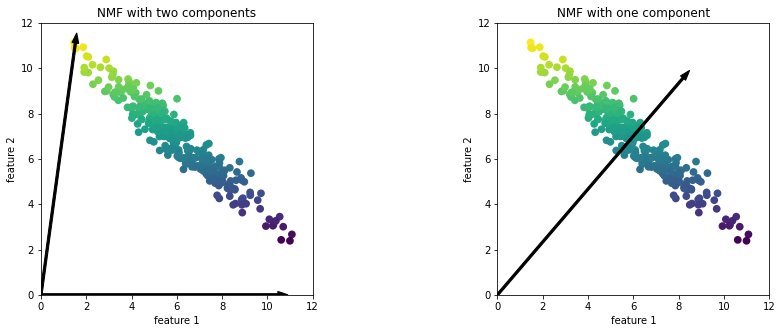

In [1]:
import mglearn

mglearn.plots.plot_nmf_illustration()

* 얼굴 이미지에 NMF 적용하기

In [2]:
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

X_train, X_test, y_train, y_test = train_test_split(
    X_people,
    y_people,
    stratify=y_people,
    random_state=0
)

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.117647, ..., 0.613072]], dtype=float32))


c:\Users\posky\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
c:\Users\posky\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
c:\Users\posky\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
c:\Users\posky\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it 

______________________________________________________nmf_faces - 176.7s, 2.9min


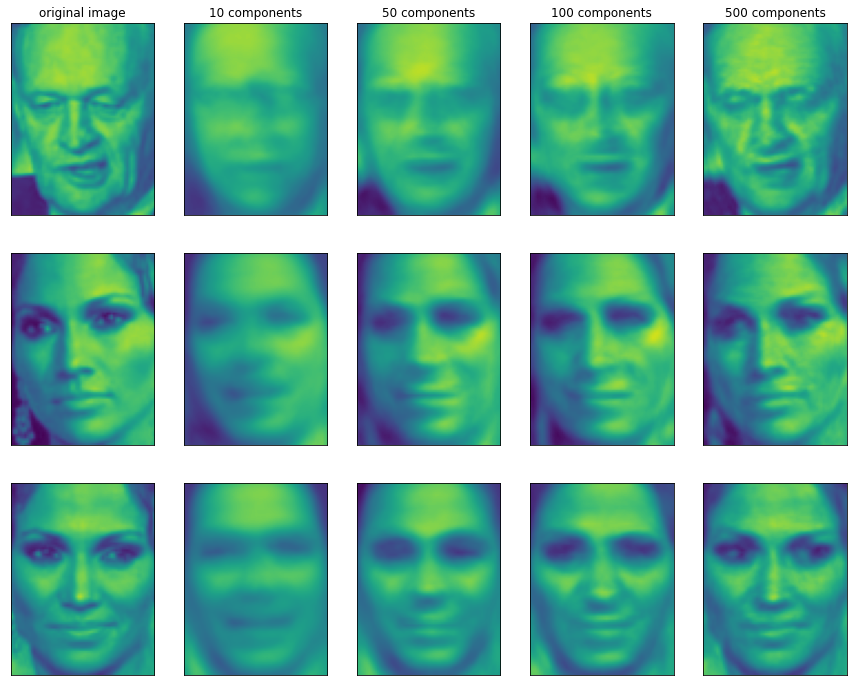

In [3]:
mglearn.plots.plot_nmf_faces(X_train, X_test[:3], image_shape)

* NMF는 데이터를 인코딩하거나 재구성하는 용도로 사용하기보다는 주로 데이터에 있는 유용한 패턴을 찾는 데 활용.

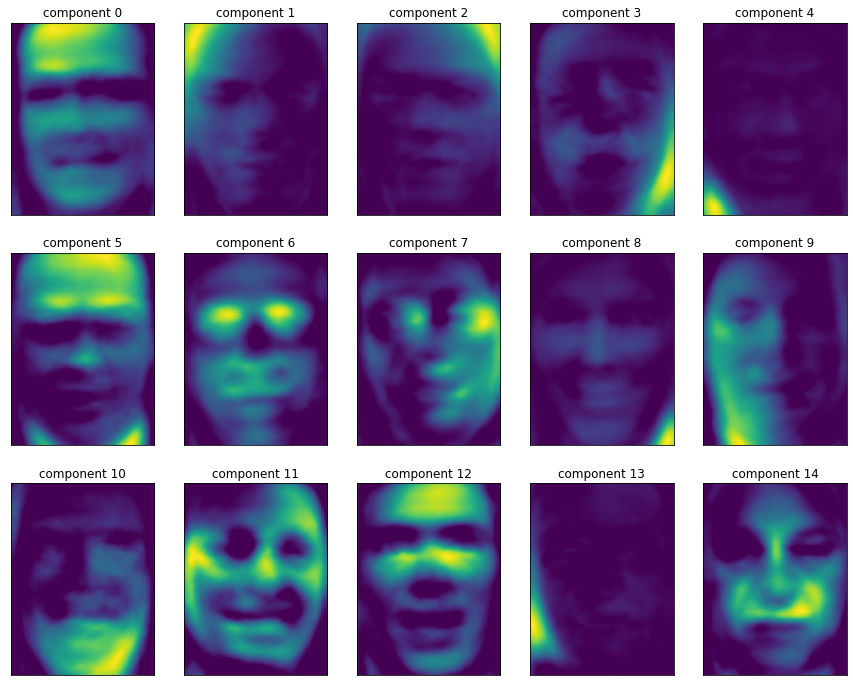

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF

nmf = NMF(n_components=15, init='nndsvd', random_state=0, max_iter=1000, tol=1e-2)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title('component {}'.format(i))

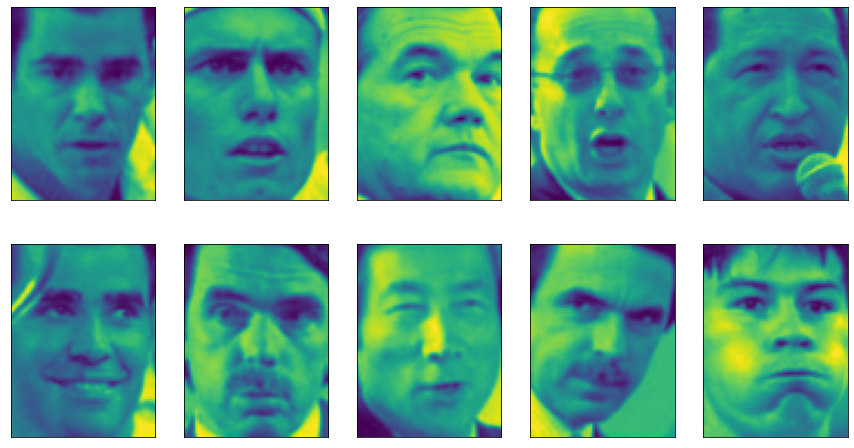

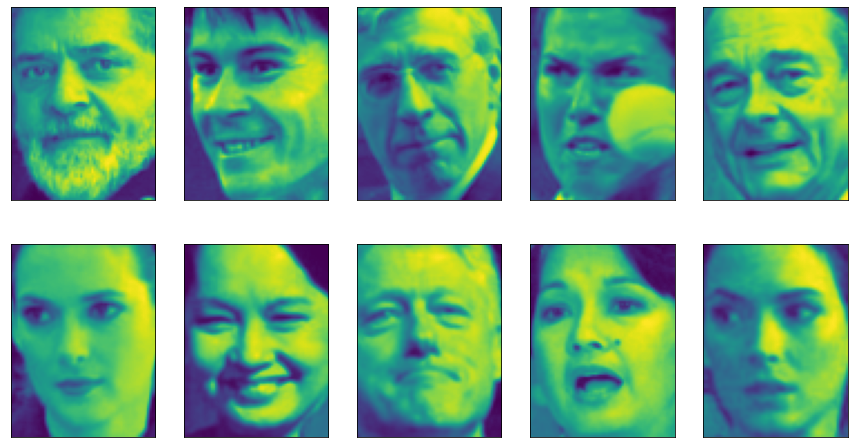

In [5]:
compn = 3
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

compn=7
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

(3, 2000)

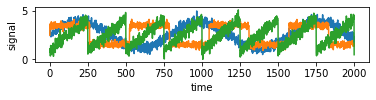

In [12]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel('time')
plt.ylabel('signal')

In [7]:
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print('measured data shape:', X.shape)

measured data shape: (2000, 100)


In [13]:
nmf = NMF(n_components=3, init='nndsvd', random_state=42, max_iter=1000, tol=1e-2)
S_ = nmf.fit_transform(X)
print('restored signal data shape:', S_.shape)

restored signal data shape: (2000, 3)


In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
H = pca.fit_transform(X)

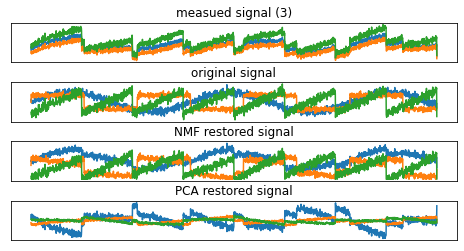

In [16]:
models = [X, S, S_, H]
names = ['measued signal (3)', 'original signal', 'NMF restored signal', 'PCA restored signal']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')